# CMSE 202 - Final Project - Image Recognition (Shapes)

Ethan Chen, Jack Jackson, William Roberts, Nithin Yeruva, Varun Sukhavasi


# Code

Make sure tensorflow is installed on your machine 

In [1]:
#These are for the image importing
import os
import fnmatch
from PIL import Image , ImageOps
import numpy as np

#This is for the Data split
import random

#These are for the AI training 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import confusion_matrix, classification_report

#These are for data visualizatioan
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


2024-11-19 10:39:37.052039: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
class Shape():

    def __init__(self,name):
        self.name = name
        self.images = []
        self.labels = []
        
        self.get_data()
        
    def get_data(self):
        '''
        Reads in data from files based on the shape's name using PIL
        Adds data to self.images
        Adds labels as a list of the shape's name duplicated per image
        '''   
        
        for path,dirs,files in os.walk('Data/data'):
            for f in fnmatch.filter(files,'*.png'):
                fullname = os.path.abspath(os.path.join(path,f))
                if str(f)[:5] == self.name[:5]:
                    image = Image.open(fullname)
                    image = image.convert('L')
                    image = image.resize((28, 28)) 
                    img_array = np.array(image) / 255
                    self.images.append(img_array)
                    self.labels.append(self.name)


def data_split(data,labels,split=0.75):
    '''
    Splits the data and returns test and train data with test and train labels
    Split is decimal from 0 to 1 of training data
        I.e, if split is 0.75, 75% of the data gets assigned to training data
    returns in order of train_data , train_labels, test_data, test_labels 
    '''

    #This is exactly train_test_split from sklearn
    #I forgot about it when writing this function
    
    ### code from https://www.geeksforgeeks.org/python-shuffle-two-lists-with-same-order/ accessed 11/6/24
    temp = list(zip(data, labels))
    random.shuffle(temp)
    res1, res2 = zip(*temp)
    shuffeled_data, shuffeled_labels = list(res1), list(res2)

    
    split_no = int(len(data)*split)
    
    test_data    = shuffeled_data[split_no:]
    test_labels  = shuffeled_labels[split_no:]
    train_data   = shuffeled_data[:split_no]
    train_labels = shuffeled_labels[:split_no]

    return np.array(train_data) , np.array(train_labels), np.array(test_data), np.array(test_labels)


In [3]:
circles    = Shape('ellipse')
rectangles = Shape('rectangle')
triangles  = Shape('triangle')

shapes = [circles,rectangles,triangles]


In [4]:
data   = circles.images + rectangles.images + triangles.images
labels = circles.labels + rectangles.labels + triangles.labels

#The data needs to be in this shape for the tensor flow to work
data = np.array(data).reshape(-1, 28, 28, 1)

labels = np.array(labels)

labels[labels == 'ellipse'] = 0
labels[labels == 'rectangle'] = 1
labels[labels == 'triangle'] = 2

labels = labels.astype(int)

train_data , train_labels, test_data, test_labels = data_split(data,labels,0.7)


###From ChatGPT, accessed 11/5/24 "Can you help me to write a keres CNN classifying 28x28 grayscale images into 
#3 categories with 2 conv layers, max-pooling, and softmax output."
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model amount of passes 
history = model.fit(train_data, train_labels, epochs=10, validation_data=(test_data, test_labels), batch_size=32)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy:.2f}")

# Displaying the model's architecture
model.summary()

/Users/nithinyeruva/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 9s 17ms/step - accuracy: 0.6163 - loss: 0.8230 - val_accuracy: 0.8664 - val_loss: 0.3358
Epoch 2/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8838 - loss: 0.2982 - val_accuracy: 0.9169 - val_loss: 0.2173
Epoch 3/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9244 - loss: 0.2018 - val_accuracy: 0.9345 - val_loss: 0.1946
Epoch 4/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.9408 - loss: 0.1593 - val_accuracy: 0.9459 - val_loss: 0.1590
Epoch 5/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.9555 - loss: 0.1286 - val_accuracy: 0.9517 - val_loss: 0.1396
Epoch 6/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.9687 - loss: 0.0936 - val_accuracy: 0.9557 - val_loss: 0.1303
Epoch 7/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 8s 18ms/step - accuracy: 0.9725 - loss: 0.0847 - val_accuracy: 0.9480 - val_loss: 0.1478
Epoch 8/10
438/438 ━━━━━━━━━━━━━━━━━━━━ 7s 15ms/step - accuracy: 0.9757 - loss: 0.0700 - val_accu

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 364,427 (1.39 MB)

 Trainable params: 121,475 (474.51 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 242,952 (949.04 KB)

Epoch 1/50


/Users/nithinyeruva/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 124ms/step - accuracy: 0.6100 - loss: 0.9436 - val_accuracy: 0.7402 - val_loss: 0.6006 - learning_rate: 0.0010
Epoch 2/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 56s 129ms/step - accuracy: 0.8314 - loss: 0.4278 - val_accuracy: 0.8979 - val_loss: 0.2811 - learning_rate: 0.0010
Epoch 3/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 55s 125ms/step - accuracy: 0.8645 - loss: 0.3334 - val_accuracy: 0.8806 - val_loss: 0.3149 - learning_rate: 0.0010
Epoch 4/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 147ms/step - accuracy: 0.8938 - loss: 0.2691 - val_accuracy: 0.8101 - val_loss: 0.7759 - learning_rate: 0.0010
Epoch 5/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 55s 126ms/step - accuracy: 0.9094 - loss: 0.2372 - val_accuracy: 0.9250 - val_loss: 0.1927 - learning_rate: 0.0010
Epoch 6/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 57s 131ms/step - accuracy: 0.9304 - loss: 0.1826 - val_accuracy: 0.9367 - val_loss: 0.1624 - learning_rate: 0.0010
Epoch 7/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 60s 137ms/step - accuracy: 0.9389 - loss:

438/438 ━━━━━━━━━━━━━━━━━━━━ 61s 139ms/step - accuracy: 0.9851 - loss: 0.0446 - val_accuracy: 0.9948 - val_loss: 0.0138 - learning_rate: 4.0000e-05
Epoch 44/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 64s 145ms/step - accuracy: 0.9847 - loss: 0.0438 - val_accuracy: 0.9950 - val_loss: 0.0145 - learning_rate: 4.0000e-05
Epoch 45/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - accuracy: 0.9837 - loss: 0.0494 - val_accuracy: 0.9953 - val_loss: 0.0136 - learning_rate: 4.0000e-05
Epoch 46/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - accuracy: 0.9852 - loss: 0.0441 - val_accuracy: 0.9943 - val_loss: 0.0135 - learning_rate: 4.0000e-05
Epoch 47/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 59s 134ms/step - accuracy: 0.9833 - loss: 0.0472 - val_accuracy: 0.9942 - val_loss: 0.0145 - learning_rate: 4.0000e-05
Epoch 48/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/step - accuracy: 0.9859 - loss: 0.0439 - val_accuracy: 0.9955 - val_loss: 0.0126 - learning_rate: 1.0000e-05
Epoch 49/50
438/438 ━━━━━━━━━━━━━━━━━━━━ 58s 133ms/s

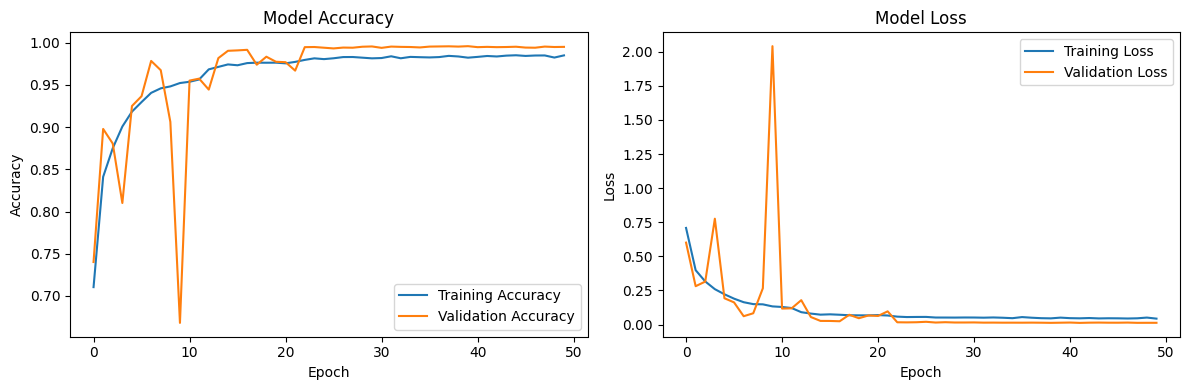

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step


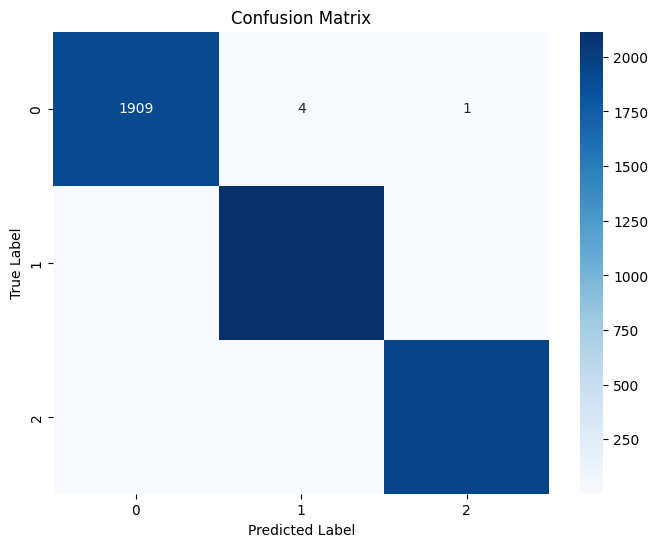


Classification Report:
              precision    recall  f1-score   support

      Circle       0.99      1.00      1.00      1914
      Square       1.00      0.99      0.99      2136
    Triangle       0.99      1.00      1.00      1954

    accuracy                           1.00      6004
   macro avg       1.00      1.00      1.00      6004
weighted avg       1.00      1.00      1.00      6004



In [5]:
datagen = ImageDataGenerator(
    rotation_range=10,  # randomly rotate images by up to 10 degrees
    zoom_range=0.1,    # randomly zoom in/out by up to 10%
    width_shift_range=0.1,  # randomly shift images horizontally by up to 10%
    height_shift_range=0.1, # randomly shift images vertically by up to 10%
    horizontal_flip=True,   # randomly flip images horizontally
    fill_mode='nearest'    # strategy for filling in newly created pixels
)


model = Sequential([
    #First Convolutional Block
    Conv2D(32, (3, 3), padding='same', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(32, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    #Second Convolutional Block
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(64, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    #Third Convolutional Block
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    Conv2D(128, (3, 3), padding='same'),
    BatchNormalization(),
    Activation('relu'),
    MaxPooling2D((2, 2)),
    Dropout(0.25),
    
    #Fully Connected Layers
    Flatten(),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    Dropout(0.5),
    Dense(3, activation='softmax') #Output layer for 3 classes
])

# Compile with better learning rate
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Callbacks for better training
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.2,
    patience=5,
    min_lr=0.00001
)

# Train with data augmentation
history = model.fit(
    datagen.flow(train_data, train_labels, batch_size=32),
    epochs=50,
    validation_data=(test_data, test_labels),
    callbacks=[early_stopping, reduce_lr]
)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test accuracy: {test_accuracy:.4f}")


# Plot training history
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


# Print confusion matrix
predictions = model.predict(test_data)
pred_classes = np.argmax(predictions, axis=1)

cm = confusion_matrix(test_labels, pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print("\nClassification Report:")
print(classification_report(test_labels, pred_classes, 
                          target_names=['Circle', 'Square', 'Triangle']))


In [6]:
# Check prediction probabilities for a few samples
sample_predictions = model.predict(test_data)
print("Prediction probabilities:")
print("Format: [Circle, Square, Triangle]")
for i, pred in enumerate(sample_predictions):
    if test_labels[i] != np.argmax(pred):
        print(test_labels[i], np.argmax(pred))

188/188 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step
Prediction probabilities:
Format: [Circle, Square, Triangle]
2 0
1 0
1 0
1 0
1 2
1 0
1 2
1 0
1 2
0 1
1 0
0 1
1 2
2 0
1 2
1 0
1 2
1 2
1 0
0 1
1 2
1 0
0 2
1 0
1 0
1 0
1 2
2 1
0 1


# Analysis 

Below we included graphs and data that shows the results of our model 

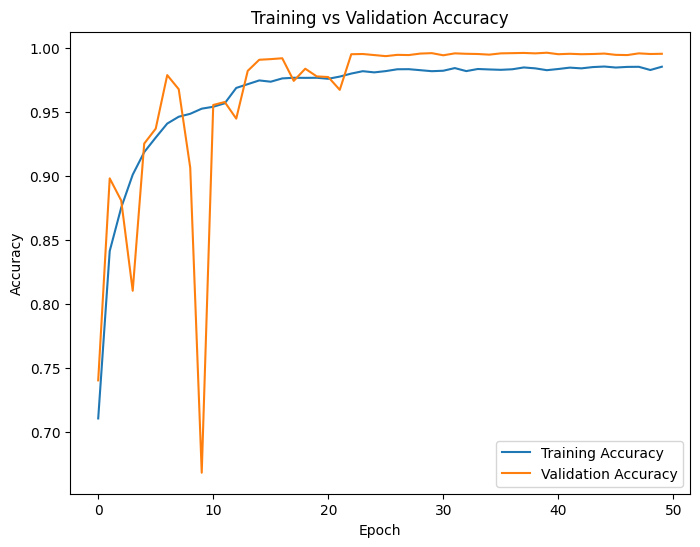

In [7]:
# Training vs Validation Accuracy

plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


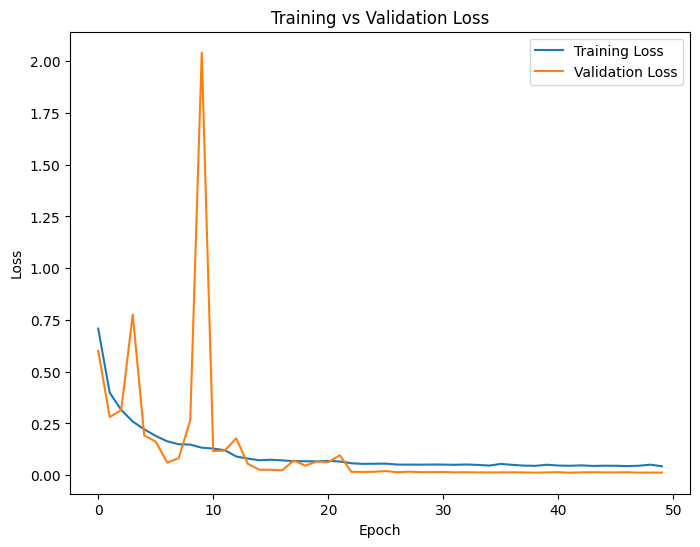

In [8]:
# Training vs Validation Loss

plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


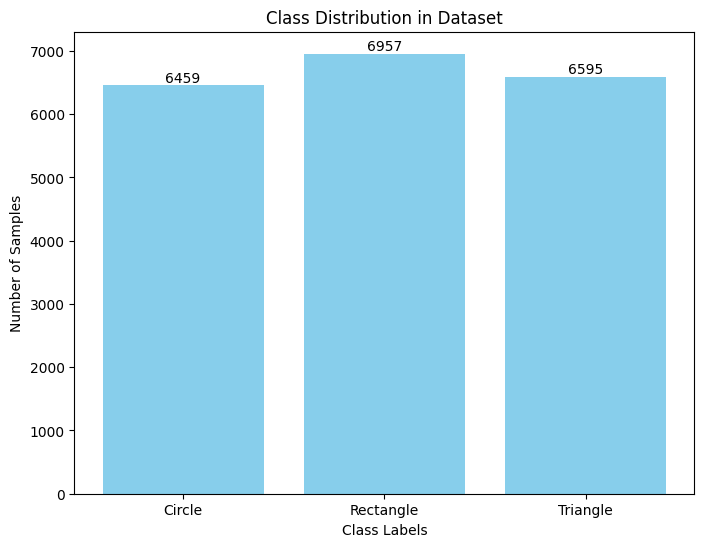

In [9]:
# Class Distribution with Numbers on Bars
unique, counts = np.unique(labels, return_counts=True)

plt.figure(figsize=(8, 6))
bars = plt.bar(unique, counts, color='skyblue')

# adds the numbers for each bar 
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom') #GPT 4 11/18/24 "How would I be able to add numbers above bars in python"

plt.title('Class Distribution in Dataset')
plt.xlabel('Class Labels')
plt.ylabel('Number of Samples')
plt.xticks(ticks=[0, 1, 2], labels=['Circle', 'Rectangle', 'Triangle'])
plt.show()


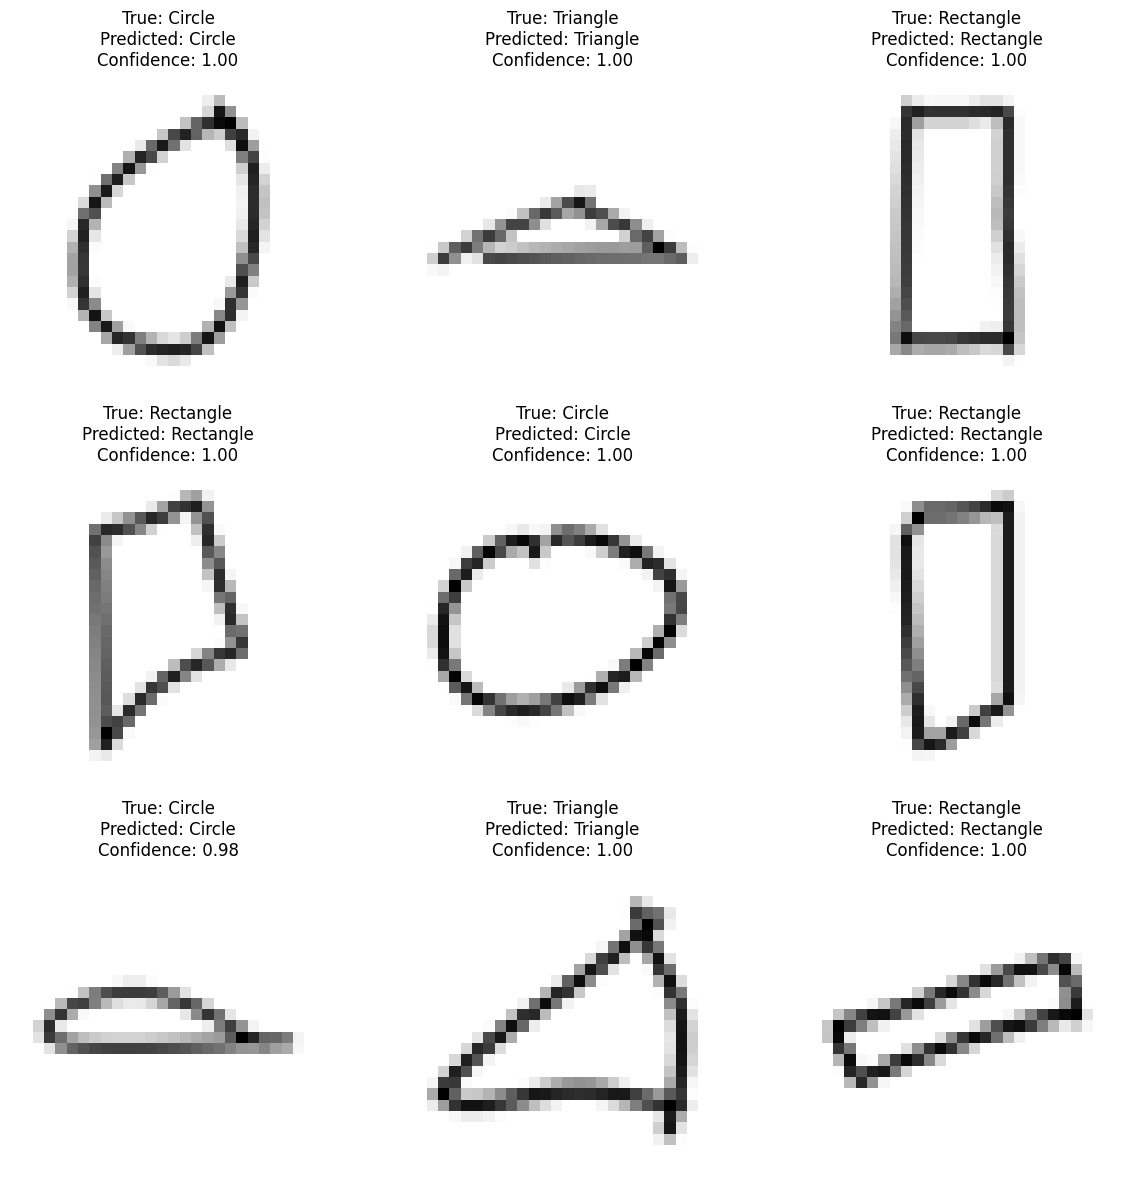

In [10]:
plt.figure(figsize=(12, 12))
for i in range(9):
    index = np.random.randint(0, len(test_data))
    true_label = test_labels[index]
    predicted_label = pred_classes[index]
    probabilities = predictions[index]
    
    plt.subplot(3, 3, i + 1)
    plt.imshow(test_data[index].reshape(28, 28), cmap='gray')
    plt.title(
        f"True: {['Circle', 'Rectangle', 'Triangle'][true_label]}\n"
        f"Predicted: {['Circle', 'Rectangle', 'Triangle'][predicted_label]}\n"
        f"Confidence: {probabilities[predicted_label]:.2f}"
    )
    plt.axis('off')

plt.tight_layout()
plt.show()

#GPT 4 10/18/2024 "Can you help to implement numbers for this graph"


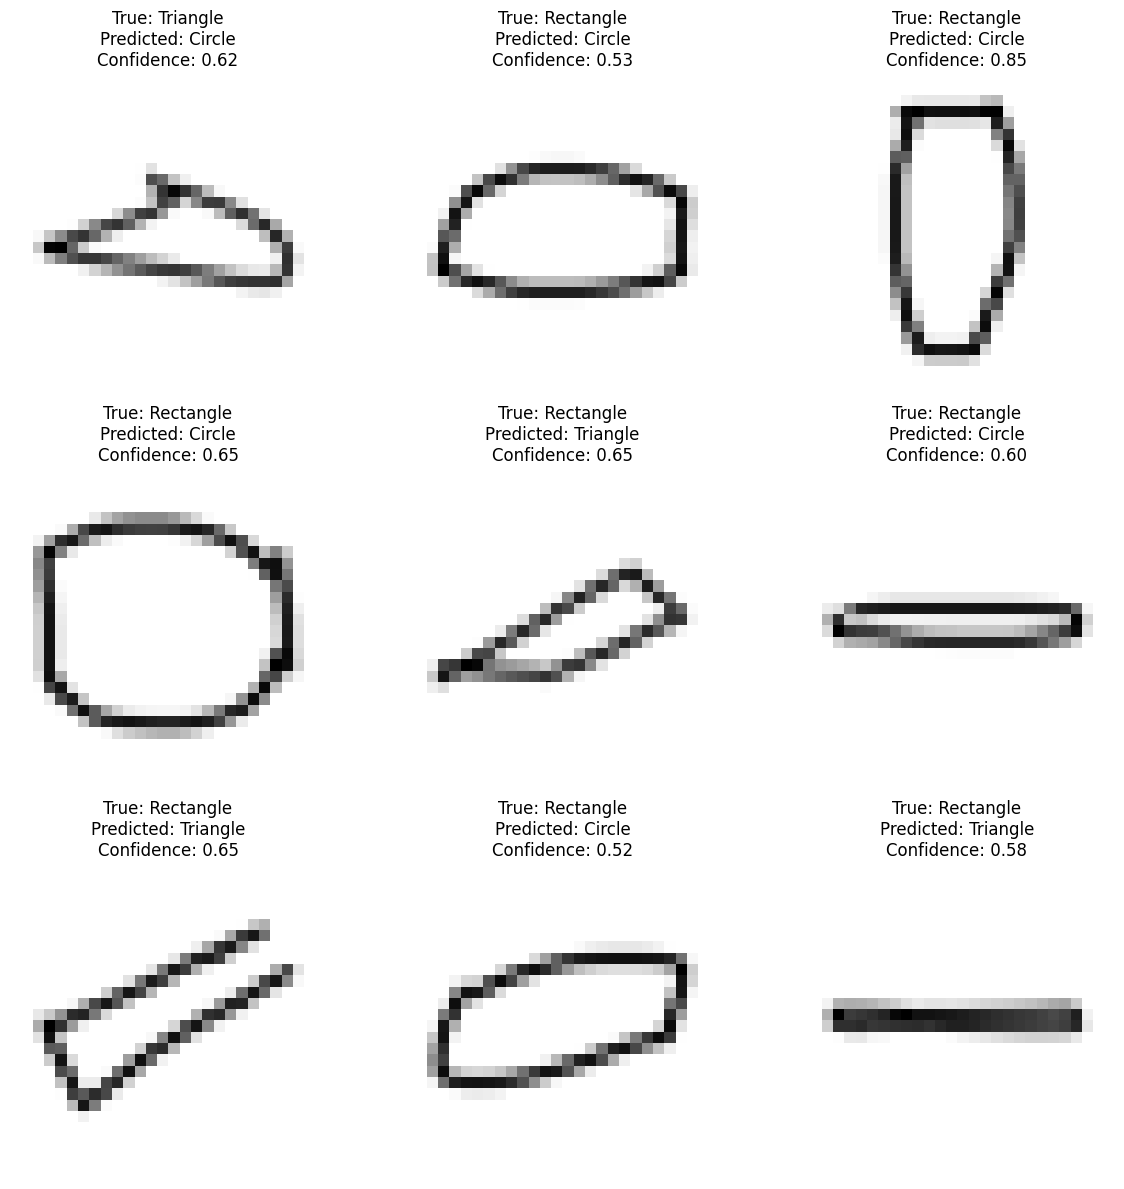

In [11]:
# Display a few misclassified samples with prediction probabilities
misclassified_indices = np.where(test_labels != pred_classes)[0]

plt.figure(figsize=(12, 12))
for i in range(min(9, len(misclassified_indices))):
    index = misclassified_indices[i]
    true_label = test_labels[index]
    predicted_label = pred_classes[index]
    probabilities = predictions[index]

    plt.subplot(3, 3, i + 1)
    plt.imshow(test_data[index].reshape(28, 28), cmap='gray')
    plt.title(
        f"True: {['Circle', 'Rectangle', 'Triangle'][true_label]}\n"
        f"Predicted: {['Circle', 'Rectangle', 'Triangle'][predicted_label]}\n"
        f"Confidence: {probabilities[predicted_label]:.2f}"
    )
    plt.axis('off')

plt.tight_layout()
plt.show()

#GPT 4 10/18/2024 "Can you help to implement numbers for this graph"



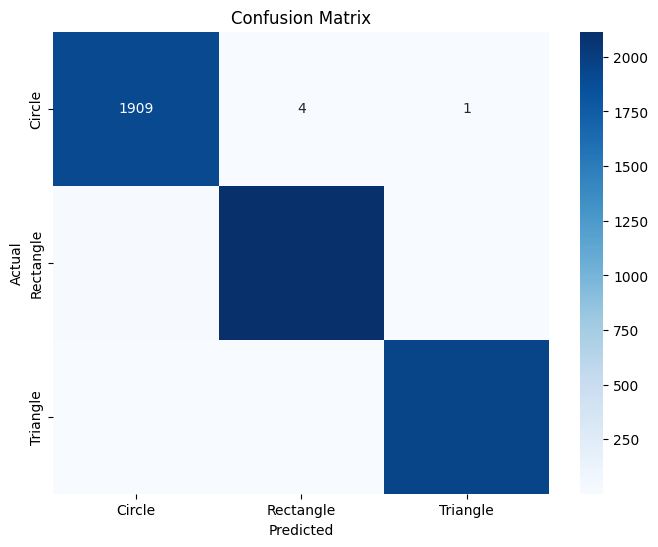

In [12]:
# Heatmap of the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Circle', 'Rectangle', 'Triangle'], 
            yticklabels=['Circle', 'Rectangle', 'Triangle'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


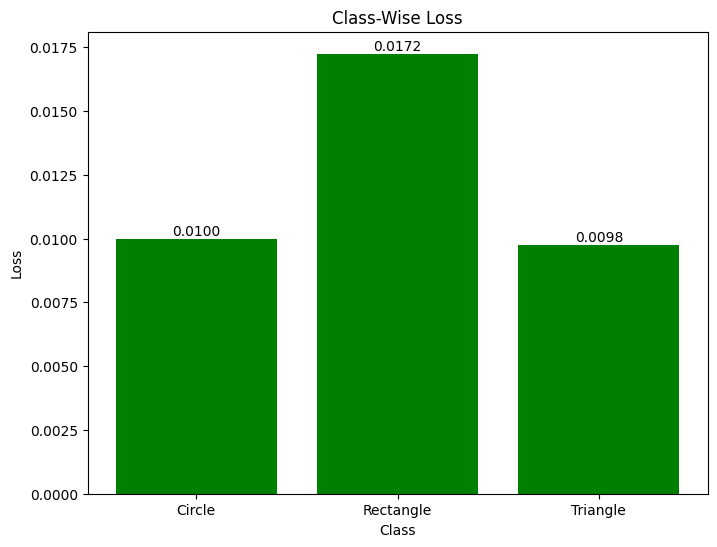

In [13]:
# Class-Wise Loss during training with numbers on bars
class_losses = []
for cls in range(3):
    cls_indices = train_labels == cls
    cls_data = train_data[cls_indices]
    cls_labels = train_labels[cls_indices]
    cls_loss = model.evaluate(cls_data, cls_labels, verbose=0)[0]
    class_losses.append(cls_loss)

plt.figure(figsize=(8, 6))
bars = plt.bar(['Circle', 'Rectangle', 'Triangle'], class_losses, color='green')

# adds the numbers for each bar 
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{class_losses[i]:.4f}', ha='center', va='bottom')

plt.title('Class-Wise Loss')
plt.xlabel('Class')
plt.ylabel('Loss')
plt.show()


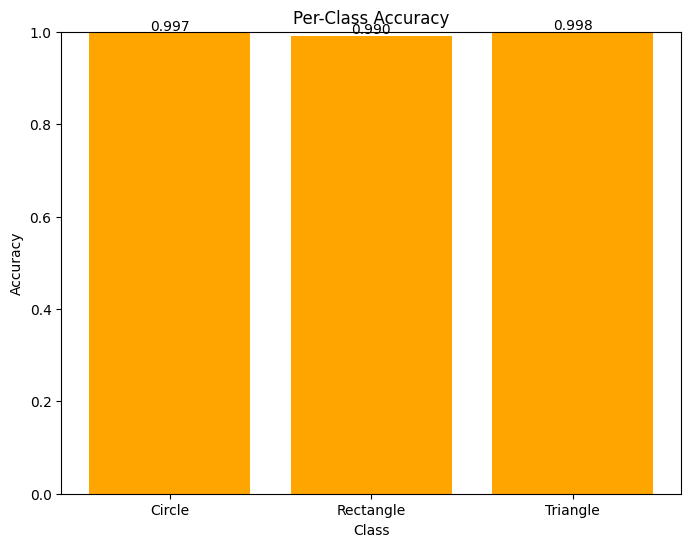

In [18]:
# Calculate per-class accuracy with numbers on bars
class_accuracies = cm.diagonal() / cm.sum(axis=1)

plt.figure(figsize=(8, 6))
bars = plt.bar(['Circle', 'Rectangle', 'Triangle'], class_accuracies, color='orange')

# adds the numbers for each bar 
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{class_accuracies[i]:.3f}', ha='center', va='bottom')

plt.title('Per-Class Accuracy')
plt.xlabel('Class')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.show()


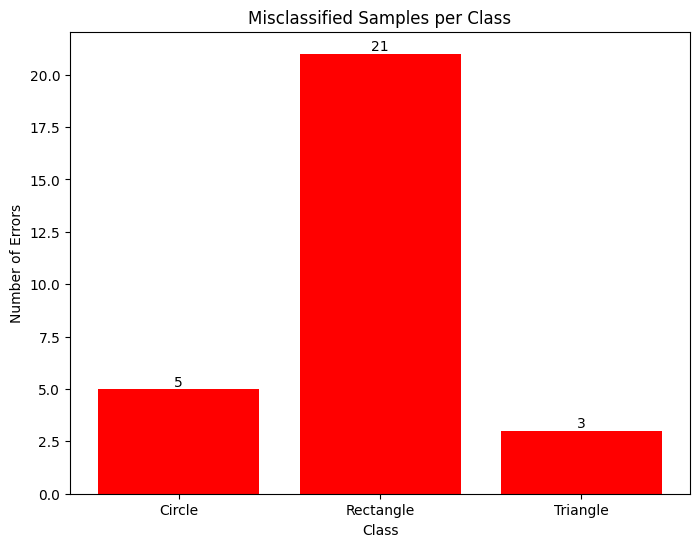

In [16]:
# Count misclassified samples per class with numbers on bars
errors_per_class = []
for cls in range(3):
    errors_per_class.append(np.sum((test_labels == cls) & (pred_classes != cls)))

plt.figure(figsize=(8, 6))
bars = plt.bar(['Circle', 'Rectangle', 'Triangle'], errors_per_class, color='red')

# Adding numbers above each bar
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(errors_per_class[i]), ha='center', va='bottom')

plt.title('Misclassified Samples per Class')
plt.xlabel('Class')
plt.ylabel('Number of Errors')
plt.show()
